In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# read the dataset
cricket_df = pd.read_csv("Cricket.csv", sep=",", encoding="ISO-8859-1", header=0)
cricket_df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [3]:
# basics of the df
cricket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
Player    79 non-null object
Span      79 non-null object
Mat       79 non-null int64
Inns      79 non-null int64
NO        79 non-null int64
Runs      79 non-null int64
HS        79 non-null object
Ave       79 non-null float64
BF        79 non-null int64
SR        79 non-null float64
100       79 non-null int64
50        79 non-null int64
0         79 non-null int64
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


In [4]:
grouped_df = cricket_df[['Player', 'SR', 'Ave']]
grouped_df.head()

,Player,SR,Ave
0,SR Tendulkar (INDIA),86.23,44.83
1,KC Sangakkara (Asia/ICC/SL),78.86,41.98
2,RT Ponting (AUS/ICC),80.39,42.03
3,ST Jayasuriya (Asia/SL),91.20,32.36
4,DPMD Jayawardene (Asia/SL),78.96,33.37


In [5]:
# 2. rescaling
rfm_df = cricket_df[['SR', 'Ave']]

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(79, 2)

In [6]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['SR', 'Ave']
rfm_df_scaled.head()

,SR,Ave
0,0.703152,1.072294
1,-0.044139,0.587725
2,0.110997,0.596226
3,1.207091,-1.047909
4,-0.034000,-0.876185


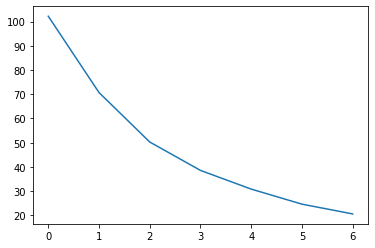

In [7]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [8]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.37632823237612395
For n_clusters=3, the silhouette score is 0.37047300011047957
For n_clusters=4, the silhouette score is 0.3836904829421138
For n_clusters=5, the silhouette score is 0.3707423974593574
For n_clusters=6, the silhouette score is 0.37992910667909674
For n_clusters=7, the silhouette score is 0.38416020491604685
For n_clusters=8, the silhouette score is 0.3715068271812386


In [9]:
# final model with k=3
kmeans = KMeans(n_clusters=2, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
# assign the label
grouped_df['cluster_id'] = kmeans.labels_
grouped_df.head()

c:\Users\s.ag.chakraborty\AppData\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Player,SR,Ave,cluster_id
0,SR Tendulkar (INDIA),86.23,44.83,1
1,KC Sangakkara (Asia/ICC/SL),78.86,41.98,0
2,RT Ponting (AUS/ICC),80.39,42.03,1
3,ST Jayasuriya (Asia/SL),91.20,32.36,1
4,DPMD Jayawardene (Asia/SL),78.96,33.37,0


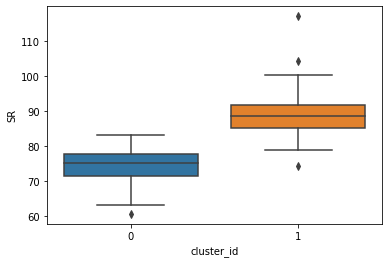

In [11]:
# plot
sns.boxplot(x='cluster_id', y='SR', data=grouped_df)

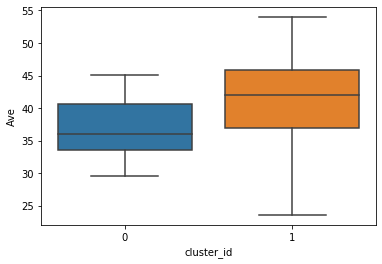

In [12]:
# plot
sns.boxplot(x='cluster_id', y='Ave', data=grouped_df)

In [13]:
# final model with k=3
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
# assign the label
grouped_df['cluster_id'] = kmeans.labels_
grouped_df.head()

c:\Users\s.ag.chakraborty\AppData\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Player,SR,Ave,cluster_id
0,SR Tendulkar (INDIA),86.23,44.83,0
1,KC Sangakkara (Asia/ICC/SL),78.86,41.98,3
2,RT Ponting (AUS/ICC),80.39,42.03,3
3,ST Jayasuriya (Asia/SL),91.20,32.36,1
4,DPMD Jayawardene (Asia/SL),78.96,33.37,2


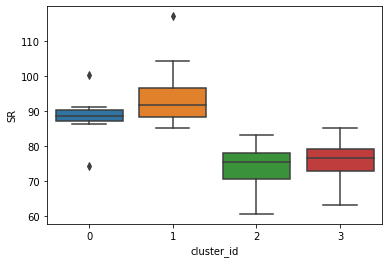

In [15]:
# plot
sns.boxplot(x='cluster_id', y='SR', data=grouped_df)

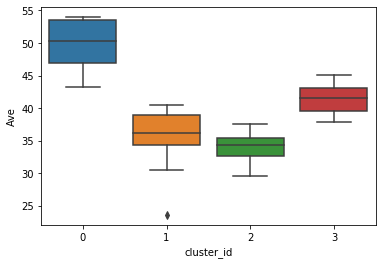

In [16]:
# plot
sns.boxplot(x='cluster_id', y='Ave', data=grouped_df)

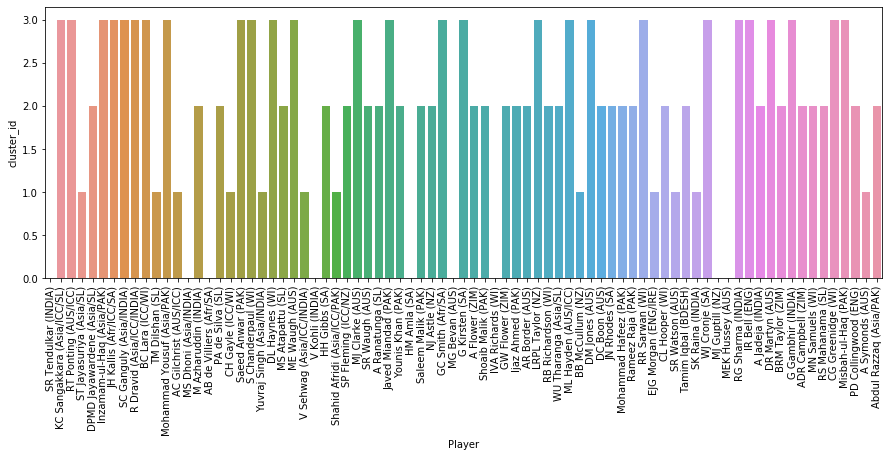

In [17]:
# plot
plt.figure(figsize=[15,5])
sns.barplot(x='Player', y='cluster_id', data= grouped_df)
plt.xticks(rotation=90)
plt.show()

In [18]:
grouped_df[grouped_df.cluster_id == 0]

,Player,SR,Ave,cluster_id
0,SR Tendulkar (INDIA),86.23,44.83,0
13,MS Dhoni (Asia/INDIA),88.69,51.32,0
15,AB de Villiers (Afr/SA),100.25,53.55,0
25,V Kohli (INDIA),90.99,53.94,0
34,HM Amla (SA),89.05,50.25,0
38,MG Bevan (AUS),74.16,53.58,0
42,IVA Richards (WI),90.20,47.00,0
63,MJ Guptill (NZ),87.73,43.30,0
64,MEK Hussey (AUS),87.16,48.15,0


# Hierarchical Clustering

In [19]:
rfm_df_scaled.head()

,SR,Ave
0,0.703152,1.072294
1,-0.044139,0.587725
2,0.110997,0.596226
3,1.207091,-1.047909
4,-0.034000,-0.876185


In [20]:
grouped_df.head()

,Player,SR,Ave,cluster_id
0,SR Tendulkar (INDIA),86.23,44.83,0
1,KC Sangakkara (Asia/ICC/SL),78.86,41.98,3
2,RT Ponting (AUS/ICC),80.39,42.03,3
3,ST Jayasuriya (Asia/SL),91.20,32.36,1
4,DPMD Jayawardene (Asia/SL),78.96,33.37,2


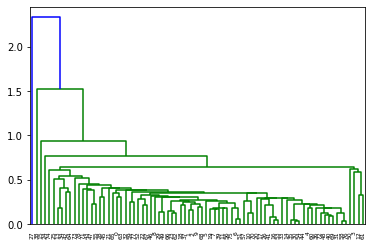

In [21]:
# single linkage
mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

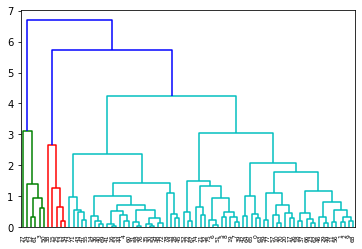

In [22]:
# complete linkage
mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [23]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 3, 2, 3, 2, 0, 0, 0, 0, 0,
       0, 0, 1, 3, 0, 1, 2, 0, 2, 2, 0, 2, 3, 2, 2, 0, 3, 0, 2, 2, 0, 2,
       2, 2, 0, 2, 2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2])

In [24]:
# assign cluster labels
grouped_df['cluster_labels'] = cluster_labels
grouped_df.head()

c:\Users\s.ag.chakraborty\AppData\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Player,SR,Ave,cluster_id,cluster_labels
0,SR Tendulkar (INDIA),86.23,44.83,0,0
1,KC Sangakkara (Asia/ICC/SL),78.86,41.98,3,0
2,RT Ponting (AUS/ICC),80.39,42.03,3,0
3,ST Jayasuriya (Asia/SL),91.20,32.36,1,1
4,DPMD Jayawardene (Asia/SL),78.96,33.37,2,2


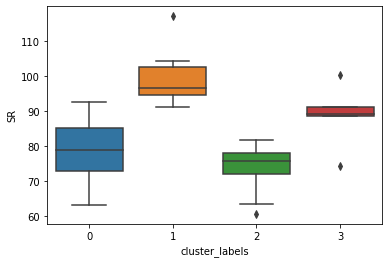

In [25]:
# plots
sns.boxplot(x='cluster_labels', y='SR', data=grouped_df)

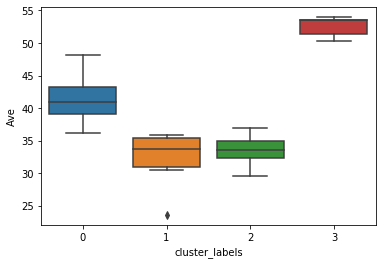

In [26]:
# plots
sns.boxplot(x='cluster_labels', y='Ave', data=grouped_df)

In [27]:
grouped_df[grouped_df.cluster_labels == 0]

,Player,SR,Ave,cluster_id,cluster_labels
0,SR Tendulkar (INDIA),86.23,44.83,0,0
1,KC Sangakkara (Asia/ICC/SL),78.86,41.98,3,0
2,RT Ponting (AUS/ICC),80.39,42.03,3,0
5,Inzamam-ul-Haq (Asia/PAK),74.24,39.52,3,0
6,JH Kallis (Afr/ICC/SA),72.89,44.36,3,0
7,SC Ganguly (Asia/INDIA),73.70,41.02,3,0
8,R Dravid (Asia/ICC/INDIA),71.24,39.16,3,0
9,BC Lara (ICC/WI),79.51,40.48,3,0
10,TM Dilshan (SL),86.23,39.27,1,0
11,Mohammad Yousuf (Asia/PAK),75.10,41.71,3,0


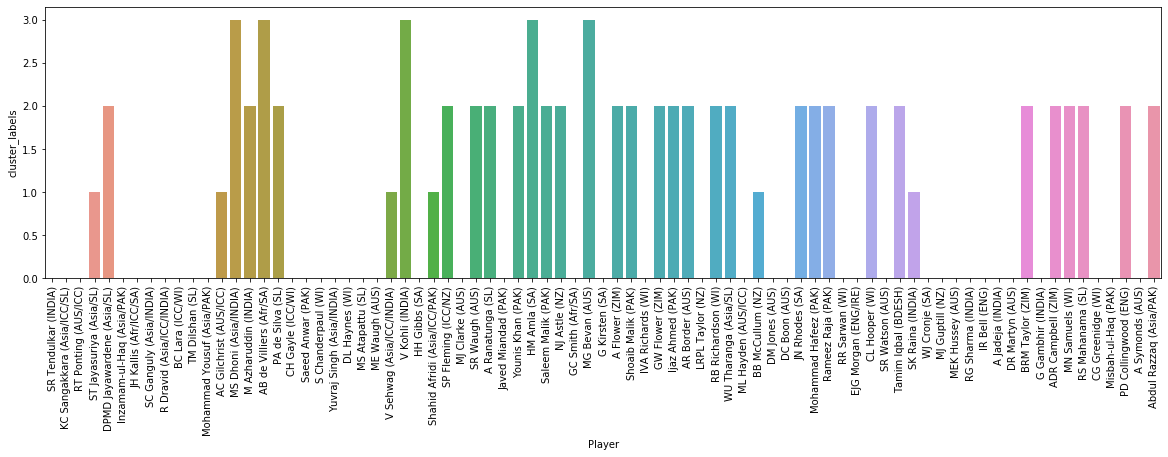

In [28]:
# plot
plt.figure(figsize=[20,5])
sns.barplot(x='Player', y='cluster_labels', data= grouped_df)
plt.xticks(rotation=90)
plt.show()